In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
data

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [5]:
data.groupby(['Animal']).sum()

,Max Speed
Animal,
Falcon,750.0
Parrot,50.0


In [6]:
data.groupby(['Animal']).min()

,Max Speed
Animal,
Falcon,370.0
Parrot,24.0


In [7]:
data.groupby(['Animal']).count()

,Max Speed
Animal,
Falcon,2
Parrot,2


In [8]:
l = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df = pd.DataFrame(l, columns=["a", "b", "c"])
df

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [10]:
df.groupby(by=['b']).sum()

,a,c
b,,
1.0,2,3
2.0,2,5


In [11]:
df.groupby(by="a", dropna=False).sum()

,b,c
a,,
1,4.0,9
2,1.0,3


In [14]:
df2 = pd.read_csv("D:\\JUPYTER2\\Pandas2\\csv file\\drinks.csv")
df2

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [15]:
# average beer serving
df2.beer_servings.mean()

106.16062176165804

In [23]:
# see the number of country in continent column
print("length: ",len(df2['continent'].unique()))
print(df2['continent'].unique())

length:  6
['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


In [26]:
# if we want to see each country how many times appears in the continent column then
df2.groupby(['continent']).count()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
Africa,53,53,53,53,53
Asia,44,44,44,44,44
Europe,45,45,45,45,45
North America,23,23,23,23,23
Oceania,16,16,16,16,16
South America,12,12,12,12,12


In [27]:
df2['continent'].value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [16]:
df2.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [17]:
# this line also the same output return
df2.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [29]:
df2[df2['continent']=='Asia'].beer_servings.mean()

37.04545454545455

In [32]:
# we can apply multiple function using agg() method
df2.groupby('continent')['beer_servings'].agg(['count','max','min','mean'])

,count,max,min,mean
continent,,,,
Africa,53,376,0,61.471698
Asia,44,247,0,37.045455
Europe,45,361,0,193.777778
North America,23,285,1,145.434783
Oceania,16,306,0,89.687500
South America,12,333,93,175.083333


In [33]:
df2.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [34]:
%matplotlib inline

<AxesSubplot:xlabel='continent'>

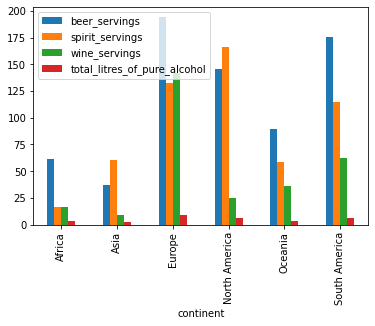

In [35]:
df2.groupby('continent').mean().plot(kind="bar")

In [36]:
df3 = pd.read_csv("weather.csv")
df3

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [37]:
group = df3.groupby('city')

In [38]:
for city,data in group:
    print(city)
    print(data)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [39]:
# to see specific group
group.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [40]:
group.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [41]:
# mean apply only the numerical data
group.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [42]:
group.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [44]:
group.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [45]:
group.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

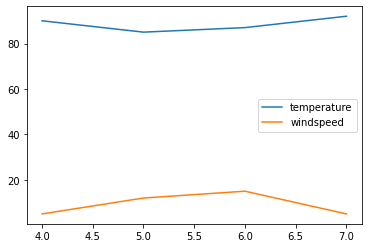

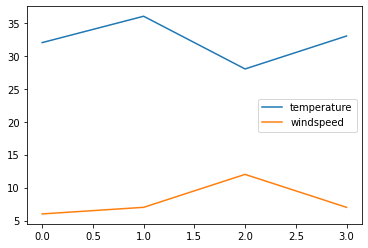

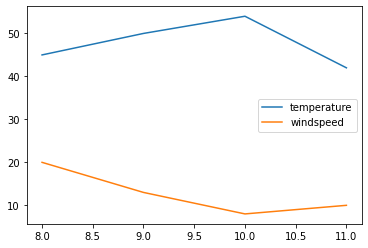

In [46]:
group.plot()

In [47]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [54]:
groups = df3.groupby(lambda x: grouper(df3, x, 'temperature'))
groups

In [55]:
for key, d in groups:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
Group by Key: 80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
Group by Key: others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy
